### import required Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

### Download the required data set

In [2]:
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473150,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


### Data preprocessing

In [4]:
stock_data = stock_data[['Close']]
stock_data = stock_data.dropna()

#### Feature engineering (here we add required data fields using exixting data for further analysis)

In [5]:
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Daily Return'] = stock_data['Close'].pct_change()

In [6]:
for lag in range(1, 6):
    stock_data[f'Lag_{lag}'] = stock_data['Close'].shift(lag)
stock_data = stock_data.dropna()

In [8]:
stock_data.head()

,Close,SMA_20,SMA_50,Daily Return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,
2010-03-16,8.016071,7.564411,7.391336,0.002725,7.994286,8.092857,8.053571,8.030000,7.965000
2010-03-17,8.004286,7.602929,7.398557,-0.001470,8.016071,7.994286,8.092857,8.053571,8.030000
2010-03-18,8.023214,7.641714,7.405893,0.002365,8.004286,8.016071,7.994286,8.092857,8.053571
2010-03-19,7.937500,7.678464,7.413950,-0.010683,8.023214,8.004286,8.016071,7.994286,8.092857
2010-03-22,8.026786,7.721911,7.424071,0.011249,7.937500,8.023214,8.004286,8.016071,7.994286


##### Close:The closing price of the stock for a given trading day.
##### SMA_20:The 20-day Simple Moving Average (SMA), calculated as the average of the closing prices for the last 20 trading days.
##### SMA_50: The 50-day Simple Moving Average (SMA), calculated as the average of the closing prices for the last 50 trading days
##### Daily Return:The daily return of the stock, representing the percentage change in the closing price from the previous trading da
##### Lag_1:The closing price of the stock on the previous trading day (one-day lag)
##### Lag_2:The closing price of the stock on the previous trading day (two-day lag)
##### Lag_3:The closing price of the stock on the previous trading day (three-day lag)
##### Lag_4:The closing price of the stock on the previous trading day (four-day lag)
##### Lag_5:The closing price of the stock on the previous trading day (five-day lag)


### Exploratory Data Analysis (EDA)

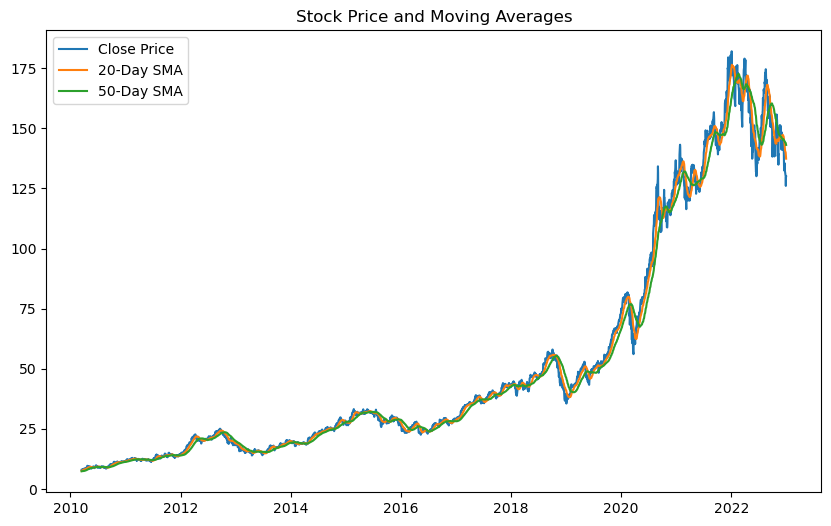

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA_20'], label='20-Day SMA')
plt.plot(stock_data['SMA_50'], label='50-Day SMA')
plt.legend()
plt.title('Stock Price and Moving Averages')
plt.show()

### Splitting and Training of data

In [10]:
X = stock_data.drop(['Close'], axis=1)
y = stock_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### selection and training of the model

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Model Evaluation

In [13]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 0.5488085214926337
MSE: 0.7427537982017673
RMSE: 0.8618316530516661


### Plotting of prediction data with Bar graph

In [14]:
plt.figure(figsize=(14, 7))
width = 0.4  # the width of the bars

<Figure size 1400x700 with 0 Axes>

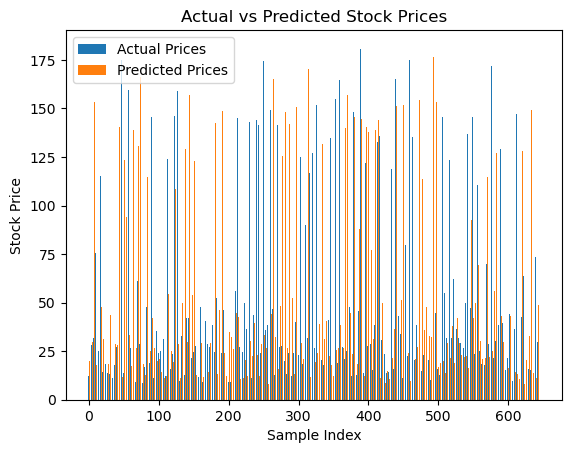

In [15]:
indices = np.arange(len(y_test))

plt.bar(indices - width/2, y_test.values, width, label='Actual Prices')
plt.bar(indices + width/2, y_pred, width, label='Predicted Prices')

plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

### Now we use logistic regression model to find the classification report of the model

##### Convert Daily Return into Labels:
##### Label "1" for an increase in stock price (up).
##### Label "0" for a decrease or no change in stock price (down).

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [18]:
stock_data['Target'] = np.where(stock_data['Daily Return'] > 0, 1, 0)
stock_data = stock_data.dropna()
stock_data.head()

,Close,SMA_20,SMA_50,Daily Return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Target
Date,,,,,,,,,,
2010-03-16,8.016071,7.564411,7.391336,0.002725,7.994286,8.092857,8.053571,8.030000,7.965000,1
2010-03-17,8.004286,7.602929,7.398557,-0.001470,8.016071,7.994286,8.092857,8.053571,8.030000,0
2010-03-18,8.023214,7.641714,7.405893,0.002365,8.004286,8.016071,7.994286,8.092857,8.053571,1
2010-03-19,7.937500,7.678464,7.413950,-0.010683,8.023214,8.004286,8.016071,7.994286,8.092857,0
2010-03-22,8.026786,7.721911,7.424071,0.011249,7.937500,8.023214,8.004286,8.016071,7.994286,1


In [19]:
X = stock_data.drop(['Close', 'Target', 'Daily Return'], axis=1)
y = stock_data['Target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.45      0.03      0.06       294
           1       0.54      0.97      0.70       351

    accuracy                           0.54       645
   macro avg       0.50      0.50      0.38       645
weighted avg       0.50      0.54      0.41       645

